In [1]:
from classy import Class
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_spec(instance):
    
    cl = instance.lensed_cl()
    ell = cl.get("ell")
    tt = cl.get("tt")
    ee = cl.get("ee")
    te = cl.get("te")
    
    dtt = 1e12 * np.multiply(np.multiply(ell, ell + 1), tt) / (2 * 3.14)
    dee = 1e12 * np.multiply(np.multiply(ell, ell + 1), ee) / (2 * 3.14)
    dte = 1e12 * np.multiply(np.multiply(ell, ell + 1), te) / (2 * 3.14)

    ell, dtt, dee, dte = ell[2:], dtt[2:], dee[2:], dte[2:]
    rte = dte / np.sqrt(dtt * dee)
    
    out_dict = {"ell": ell, "tt": dtt, "ee": dee, "te": dte, "r": rte}

    return(out_dict)

In [3]:
CDM = {'output': 'tCl,pCl,lCl,mPk',
       'lensing': 'yes',
       '100*theta_s': 1.04057,
       'omega_b': 0.022,
       'omega_cdm': 0.1200,
       'tau_reio': 0.0544,
       'non linear': 'HMcode',
       'hmcode_min_k_max': 20,
       'N_ncdm': 1,
       'N_ur': 2.0328,
       'P_k_ini type': 'two_scales',
       'ic': 'ad',                    # adiabatic primordial modes
       'k1': 0.002,
       'k2': 0.1,
       'P_{RR}^1': 2.4e-9,
       'P_{RR}^2': 2.0e-9}

## Fully adiabatic spectra

In [4]:
ad = Class()
ad.set(CDM)
ad.compute()
ad_dict = get_spec(ad)

## Fully isocurved

In [5]:
CDM['P_{II}^1'] = 2.4e-9
CDM['P_{II}^2'] = 2.0e-9
CDM['P_{RI}^1'] = 1e-50
CDM['|P_{RI}^2|'] = 1e-50

CDM['ic'] = 'cdi' #cold dark matter isocurvature modes
cdi = Class()
cdi.set(CDM)
cdi.compute()
cdi_dict = get_spec(cdi)

## Mix

In [6]:
alpha = 0.50
CDM['P_{II}^1'] = alpha*2.4e-9
CDM['P_{II}^2'] = alpha*2.0e-9
CDM['P_{RR}^1'] = (1-alpha)*2.4e-9
CDM['P_{RR}^2'] = (1-alpha)*2.0e-9

CDM['ic'] = 'ad&cdi'
ad_cdi = Class()
ad_cdi.set(CDM)
ad_cdi.compute()
ad_cdi_dict = get_spec(ad_cdi)

## Plots

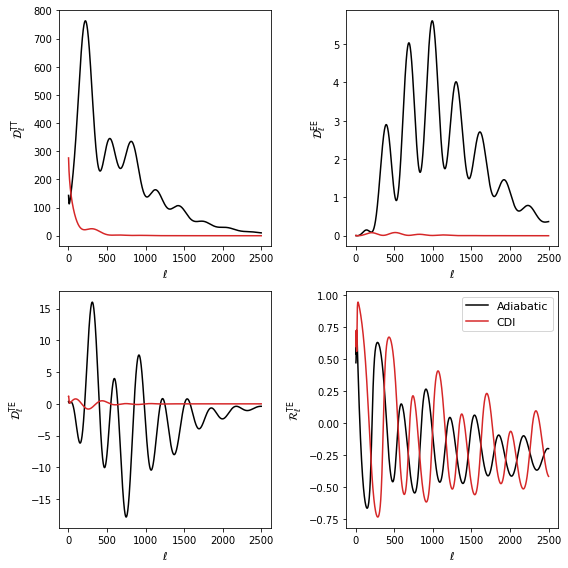

In [7]:
fig, axes = plt.subplots(2, 2, figsize = (8, 8))

axes[0, 0].plot(ad_dict["ell"], ad_dict["tt"], color = "k", label = "Adiabatic")
axes[0, 0].plot(cdi_dict["ell"], cdi_dict["tt"], color = "tab:red", label = "CDI")
axes[0, 0].set_xlabel(r"$\ell$", fontsize = 11)
axes[0, 0].set_ylabel(r"$\mathcal{D}_\ell^{\mathrm{TT}}$", fontsize = 11)
#axes[0, 0].set_xscale("log")
#axes[0, 0].set_yscale("log")

axes[0, 1].plot(ad_dict["ell"], ad_dict["ee"], color = "k", label = "Adiabatic")
axes[0, 1].plot(cdi_dict["ell"], cdi_dict["ee"], color = "tab:red", label = "CDI")
axes[0, 1].set_xlabel(r"$\ell$", fontsize = 11)
axes[0, 1].set_ylabel(r"$\mathcal{D}_\ell^{\mathrm{EE}}$", fontsize = 11)

axes[1, 0].plot(ad_dict["ell"], ad_dict["te"], color = "k", label = "Adiabatic")
axes[1, 0].plot(cdi_dict["ell"], cdi_dict["te"], color = "tab:red", label = "CDI")
axes[1, 0].set_xlabel(r"$\ell$", fontsize = 11)
axes[1, 0].set_ylabel(r"$\mathcal{D}_\ell^{\mathrm{TE}}$", fontsize = 11)

axes[1, 1].plot(ad_dict["ell"], ad_dict["r"], color = "k", label = "Adiabatic")
axes[1, 1].plot(cdi_dict["ell"], cdi_dict["r"], color = "tab:red", label = "CDI")
axes[1, 1].set_xlabel(r"$\ell$", fontsize = 11)
axes[1, 1].set_ylabel(r"$\mathcal{R}_\ell^{\mathrm{TE}}$", fontsize = 11)
axes[1, 1].legend(fontsize = 11)
plt.tight_layout()

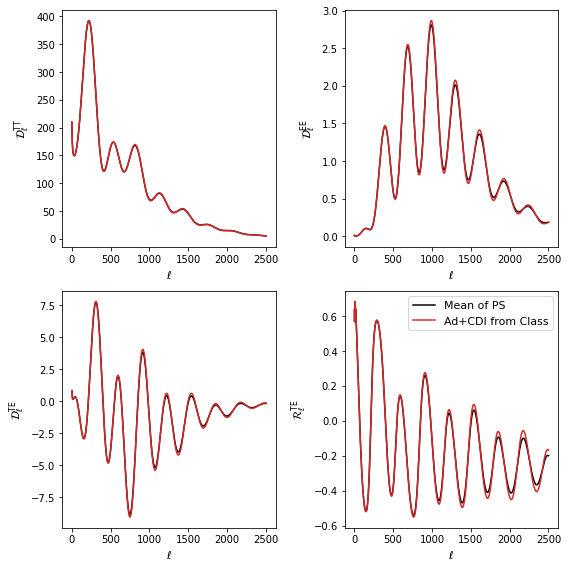

In [14]:
fig, axes = plt.subplots(2, 2, figsize = (8, 8))

tt_mean = (1-alpha) * ad_dict["tt"] + alpha * cdi_dict["tt"]
axes[0, 0].plot(ad_dict["ell"], tt_mean, color = "k", label = "Mean")
axes[0, 0].plot(cdi_dict["ell"], ad_cdi_dict["tt"], color = "tab:red", label = "Mix")
axes[0, 0].set_xlabel(r"$\ell$", fontsize = 11)
axes[0, 0].set_ylabel(r"$\mathcal{D}_\ell^{\mathrm{TT}}$", fontsize = 11)
#axes[0, 0].set_xscale("log")
#axes[0, 0].set_yscale("log")

ee_mean = (1-alpha) * ad_dict["ee"] + alpha * cdi_dict["ee"]
axes[0, 1].plot(ad_dict["ell"], ee_mean, color = "k", label = "Mean")
axes[0, 1].plot(cdi_dict["ell"], ad_cdi_dict["ee"], color = "tab:red", label = "Mix")
axes[0, 1].set_xlabel(r"$\ell$", fontsize = 11)
axes[0, 1].set_ylabel(r"$\mathcal{D}_\ell^{\mathrm{EE}}$", fontsize = 11)

te_mean = (1- alpha) * ad_dict["te"] + alpha * cdi_dict["te"]
axes[1, 0].plot(ad_dict["ell"], te_mean, color = "k", label = "Mean")
axes[1, 0].plot(cdi_dict["ell"], ad_cdi_dict["te"], color = "tab:red", label = "Mix")
axes[1, 0].set_xlabel(r"$\ell$", fontsize = 11)
axes[1, 0].set_ylabel(r"$\mathcal{D}_\ell^{\mathrm{TE}}$", fontsize = 11)

r_mean = te_mean / np.sqrt(tt_mean * ee_mean)
axes[1, 1].plot(ad_dict["ell"], r_mean, color = "k", label = "Mean of PS")
axes[1, 1].plot(cdi_dict["ell"], ad_cdi_dict["r"], color = "tab:red", label = "Ad+CDI from Class")
axes[1, 1].set_xlabel(r"$\ell$", fontsize = 11)
axes[1, 1].set_ylabel(r"$\mathcal{R}_\ell^{\mathrm{TE}}$", fontsize = 11)
axes[1, 1].legend(fontsize = 11)
plt.tight_layout()

In [9]:
import matplotlib as mpl
def var_plot(almin, almax):
    alpha_iso = np.linspace(almin,almax,40)
    norm = mpl.colors.Normalize(vmin = np.min(alpha_iso), vmax = np.max(alpha_iso))
    cmap = mpl.cm.ScalarMappable(norm = norm, cmap = mpl.cm.jet)
    cmap.set_array([])
    plt.figure(figsize = (9, 7))
    plt.grid(True, ls = "dotted")
    for al in alpha_iso:
        tt = al * cdi_dict["tt"] + (1 - al) * ad_dict["tt"]
        ee = al * cdi_dict["ee"] + (1 - al) * ad_dict["ee"]
        te = al * cdi_dict["te"] + (1 - al) * ad_dict["te"]
        R = te / np.sqrt(tt * ee)
        plt.plot(ad_dict["ell"], R, color = cmap.to_rgba(al))
    plt.xlabel(r"$\ell$")
    plt.ylabel(r"$\mathcal{R}_\ell^{\mathrm{TE}}$")
    cbar = plt.colorbar(cmap, ticks = [round(alpha_iso[i],5) for i in range(len(alpha_iso)) if (i%2==0)])
    cbar.set_label(r"$\alpha_{\mathrm{iso}} (\%)$")
    plt.tight_layout()

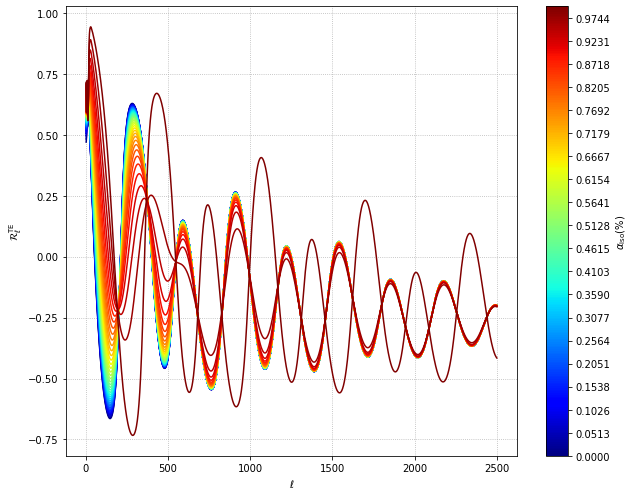

In [10]:
var_plot(0,1)

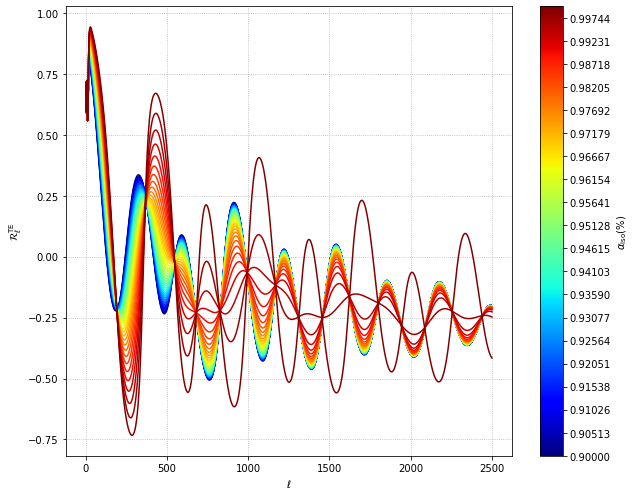

In [11]:
var_plot(0.9, 1)

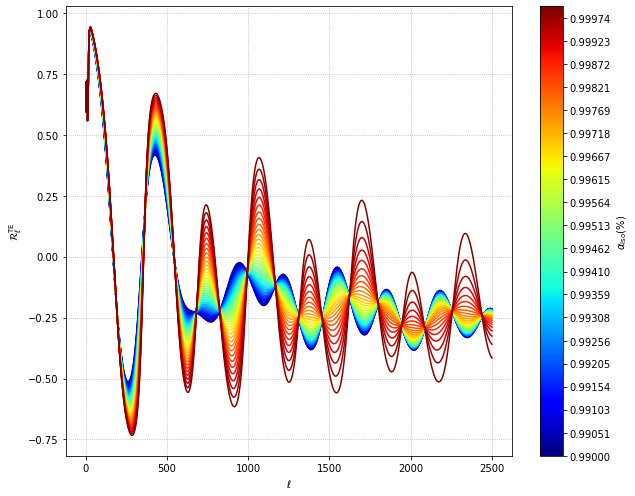

In [12]:
var_plot(0.99, 1)

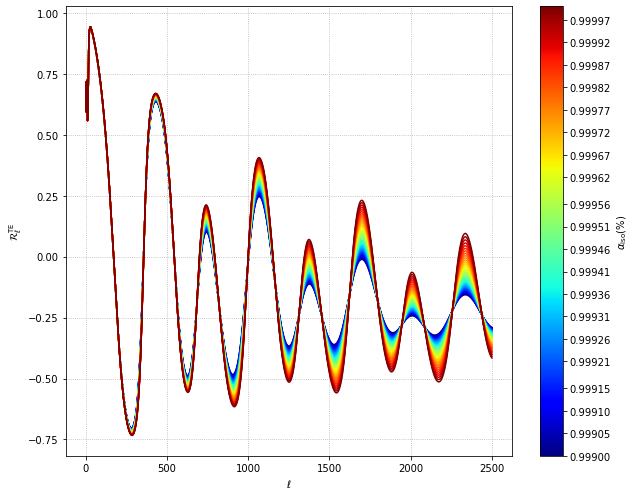

In [13]:
var_plot(0.999, 1)